In [3]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm, tree, neighbors
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

In [5]:
# LEMA
# lectura del archivo de caracteristicas de los textos
archivoLema = "tfidf_dfLema.csv"
conjuntoTextosLema = pd.read_csv(archivoLema,encoding='utf-8')
#cantidad de columnas en el dataframe
TotColumsLema=conjuntoTextosLema.shape[1]-1
print("Total columnas: "+ str(conjuntoTextosLema.shape[1]))
#print(conjuntoTextosLema)

Total columnas: 5039


In [6]:
# stemmer
# lectura del archivo de caracteristicas de los textos
archivoStem = "tfidf_dfStem.csv"
conjuntoTextosStem = pd.read_csv(archivoStem,encoding='utf-8')
#cantidad de columnas en el dataframe
TotColumsSteam=conjuntoTextosStem.shape[1]-1
print("Total columnas: "+ str(conjuntoTextosStem.shape[1]))
#print(conjuntoTextosStem)

Total columnas: 4072


In [7]:
#Lema
# Divide el conjunto en X (características) y Y (listado de clases)
X_Lema = conjuntoTextosLema.iloc[:, :TotColumsLema].values
Y_Lema = conjuntoTextosLema['Trg'].values

In [8]:
#Stemmer
# Divide el conjunto en X (características) y Y (listado de clases)
X_Stem = conjuntoTextosStem.iloc[:, :TotColumsSteam].values
Y_Stem = conjuntoTextosStem['Trg'].values

In [9]:
#Lema
# Divide los conjuntos X y Y en entrenamiento y pruebas con un 80/20
(X_entrenamientoLema, X_pruebaLema, Y_entrenamientoLema, Y_pruebaLema) = train_test_split(X_Lema, Y_Lema, test_size=0.2)
print("Cantidad de textos de entrenamiento: ", len(Y_entrenamientoLema))
print("Cantidad de textos de prueba: ",len(Y_pruebaLema))

Cantidad de textos de entrenamiento:  1471
Cantidad de textos de prueba:  368


In [10]:
#Stemmer
# Divide los conjuntos X y Y en entrenamiento y pruebas con un 80/20
(X_entrenamientoStem, X_pruebaStem, Y_entrenamientoStem, Y_pruebaStem) = train_test_split(X_Stem, Y_Stem, test_size=0.2)
print("Cantidad de textos de entrenamiento: ", len(Y_entrenamientoStem))
print("Cantidad de textos de prueba: ",len(Y_pruebaStem))

Cantidad de textos de entrenamiento:  1471
Cantidad de textos de prueba:  368


In [11]:
pd.set_option('display.max_colwidth', None)  # Ajustar la anchura de la columna
pd.set_option('display.max_rows', None)  
X_entrenamientoLema_unidimensional = [item[0] for item in X_entrenamientoLema]  # Convertir a una lista unidimensional
df = pd.DataFrame({'X_entrenamientoLema': X_entrenamientoLema_unidimensional})  # Crear un DataFrame con la columna unidimensional
df.to_csv('borrar.csv',index=False)

In [12]:
#Lema K-NN
# Entrena con los conjuntos (X,Y_entrenamiento), genera el modelo, clasifica y evalua con los conjuntos (X,Y_prueba)
# Utilizando el algoritmo K-NN con 3 vecinos
clasificadorKNN_Lema = neighbors.KNeighborsClassifier(n_neighbors=3,weights='distance')
clasificadorKNN_Lema.fit(X_entrenamientoLema, Y_entrenamientoLema)
precisionKNN_Lema = clasificadorKNN_Lema.score(X_pruebaLema, Y_pruebaLema)

In [13]:
#Stemmer K-NN
# Entrena con los conjuntos (X,Y_entrenamiento), genera el modelo, clasifica y evalua con los conjuntos (X,Y_prueba)
# Utilizando el algoritmo K-NN con 3 vecinos
clasificadorKNN_Stem = neighbors.KNeighborsClassifier(n_neighbors=3,weights='distance')
clasificadorKNN_Stem.fit(X_entrenamientoStem, Y_entrenamientoStem)
precisionKNN_Stem = clasificadorKNN_Stem.score(X_pruebaStem, Y_pruebaStem)

In [14]:
# Lema -- Obtiene e imprime las clases asignadas
#print(Y_pruebaLema)
clasesAsignadasLema = clasificadorKNN_Lema.predict(X_pruebaLema)
#print(clasesAsignadasLema)
#print("Precisión del algoritmo K-NN para Lema: ",precisionKNN_Lema*100)

In [15]:
# Stemmer -- Obtiene e imprime las clases asignadas
#print(Y_pruebaStem)
clasesAsignadasStem = clasificadorKNN_Stem.predict(X_pruebaStem)
#print(clasesAsignadasStem)
#print("Precisión del algoritmo K-NN para Stemmer: ",precisionKNN_Stem*100)

In [16]:
# Lema -- Creamos un objeto Perceptron y lo ajustamos a los datos 
clfLema = Perceptron()
clfLema.fit(X_entrenamientoLema, Y_entrenamientoLema)
# Hacemos una predicción sobre un nuevo conjunto de datos
Y_predLema = clfLema.predict(X_pruebaLema)
# Imprimimos las predicciones
#print(Y_predLema)
#print(Y_pruebaLema)

In [17]:
# Stemmer -- Creamos un objeto Perceptron y lo ajustamos a los datos
clfStem = Perceptron()
clfStem.fit(X_entrenamientoStem, Y_entrenamientoStem)
# Hacemos una predicción sobre un nuevo conjunto de datos
Y_predStem = clfStem.predict(X_pruebaStem)
# Imprimimos las predicciones
#print(Y_predStem)
#print(Y_pruebaStem)

In [18]:
# Lema -- Crear un clasificador de Naive Bayes
nbLema = GaussianNB()
# Entrenar el clasificador con el conjunto de entrenamiento
nbLema.fit(X_entrenamientoLema, Y_entrenamientoLema)

GaussianNB()

In [19]:
# Stemmer -- Crear un clasificador de Naive Bayes
nbStem = GaussianNB()
# Entrenar el clasificador con el conjunto de entrenamiento
nbStem.fit(X_entrenamientoStem, Y_entrenamientoStem)

GaussianNB()

In [20]:
# Lema -- Entrena, genera el modelo, clasifica y evalua con los conjuntos 
# Utilizando el algoritmo Maquinas de soporte vectorial
clasificadorSVM_Lema = svm.SVC()
clasificadorSVM_Lema.fit(X_entrenamientoLema, Y_entrenamientoLema)
precisionSVM_Lema = clasificadorSVM_Lema.score(X_pruebaLema, Y_pruebaLema)
print("Precisión del algoritmo SVM para Lema: ",precisionSVM_Lema*100)

Precisión del algoritmo SVM para Lema:  47.01086956521739


In [18]:
'''from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
'''

'from sklearn.model_selection import GridSearchCV\nfrom sklearn.svm import SVC\nfrom sklearn.model_selection import train_test_split\n'

In [19]:
'''

# Divide los conjuntos X y Y en entrenamiento y pruebas con un 80/20
(X_entrenamientoLema, X_pruebaLema, Y_entrenamientoLema, Y_pruebaLema) = train_test_split(X_Lema, Y_Lema, test_size=0.2)

# Definir los valores de C que se probarán
valores_C = [0.1, 10, 30, 100]

# Crear el clasificador SVM
svm = SVC()

# Definir los parámetros para la búsqueda de hiperparámetros con validación cruzada
parametros = {'C': valores_C}

# Realizar la búsqueda de hiperparámetros con validación cruzada
grid = GridSearchCV(svm, parametros, cv=10)
grid.fit(X_entrenamientoLema, Y_entrenamientoLema)

# Obtener los resultados de la búsqueda de hiperparámetros
resultados = grid.cv_results_

# Obtener el mejor valor de C y su precisión asociada
mejor_C = grid.best_params_['C']
mejor_precision = grid.best_score_

print("Mejor valor de C: ", mejor_C)
print("Precisión del algoritmo SVM para Lema: ", mejor_precision * 100)

'''

'\n\n# Divide los conjuntos X y Y en entrenamiento y pruebas con un 80/20\n(X_entrenamientoLema, X_pruebaLema, Y_entrenamientoLema, Y_pruebaLema) = train_test_split(X_Lema, Y_Lema, test_size=0.2)\n\n# Definir los valores de C que se probarán\nvalores_C = [0.1, 10, 30, 100]\n\n# Crear el clasificador SVM\nsvm = SVC()\n\n# Definir los parámetros para la búsqueda de hiperparámetros con validación cruzada\nparametros = {\'C\': valores_C}\n\n# Realizar la búsqueda de hiperparámetros con validación cruzada\ngrid = GridSearchCV(svm, parametros, cv=10)\ngrid.fit(X_entrenamientoLema, Y_entrenamientoLema)\n\n# Obtener los resultados de la búsqueda de hiperparámetros\nresultados = grid.cv_results_\n\n# Obtener el mejor valor de C y su precisión asociada\nmejor_C = grid.best_params_[\'C\']\nmejor_precision = grid.best_score_\n\nprint("Mejor valor de C: ", mejor_C)\nprint("Precisión del algoritmo SVM para Lema: ", mejor_precision * 100)\n\n'

In [21]:
# Stemmer -- Entrena, genera el modelo, clasifica y evalua con los conjuntos 
# Utilizando el algoritmo Maquinas de soporte vectorial
clasificadorSVM_Stem = svm.SVC()
clasificadorSVM_Stem.fit(X_entrenamientoStem, Y_entrenamientoStem)
precisionSVM_Stem = clasificadorSVM_Stem.score(X_pruebaStem, Y_pruebaStem)
print("Precisión del algoritmo SVM para Stemmer: ",precisionSVM_Stem*100)

Precisión del algoritmo SVM para Stemmer:  53.53260869565217


In [22]:
# Lema -- Entrena, genera el modelo, clasifica y evalua con los conjuntos 
# Utilizando elalgoritmo Arboles de Decisión
clasificadorArboles_Lema = tree.DecisionTreeClassifier()
clasificadorArboles_Lema = clasificadorArboles_Lema.fit(X_entrenamientoLema, Y_entrenamientoLema)
precisionArboles_Lema = clasificadorArboles_Lema.score(X_pruebaLema, Y_pruebaLema)
print("Precisión del algoritmo Arboles para Lema: ",precisionArboles_Lema*100)

Precisión del algoritmo Arboles para Lema:  44.29347826086957


In [23]:
# Stemmer -- Entrena, genera el modelo, clasifica y evalua con los conjuntos 
# Utilizando el algoritmo Arboles de Decisión
clasificadorArboles_Stem = tree.DecisionTreeClassifier()
clasificadorArboles_Stem = clasificadorArboles_Stem.fit(X_entrenamientoStem, Y_entrenamientoStem)
precisionArboles_Stem = clasificadorArboles_Stem.score(X_pruebaStem, Y_pruebaStem)
print("Precisión del algoritmo Arboles para Stemmer: ",precisionArboles_Stem*100)

Precisión del algoritmo Arboles para Stemmer:  41.30434782608695


In [24]:
# Lema Perceptron -- Calculamos la precisión de las predicciones
accuracyLema = accuracy_score(Y_pruebaLema, Y_predLema)
# Imprimimos la precisión
print(f"Precisión: {accuracyLema}")
precisionPerceptronLema = clfLema.score(X_pruebaLema, Y_pruebaLema)
print("Precisión del algoritmo Perceptron Lema: ",precisionPerceptronLema*100)

Precisión: 0.37228260869565216
Precisión del algoritmo Perceptron Lema:  37.22826086956522


In [25]:
# Stemmer Preceptron -- Calculamos la precisión de las predicciones
accuracyStem = accuracy_score(Y_pruebaStem, Y_predStem)
# Imprimimos la precisión
print(f"Precisión: {accuracyStem}")
precisionPerceptronStem = clfStem.score(X_pruebaStem, Y_pruebaStem)
print("Precisión del algoritmo Perceptron Stemmer: ",precisionPerceptronStem*100)

Precisión: 0.4266304347826087
Precisión del algoritmo Perceptron Stemmer:  42.66304347826087


In [35]:
# Lema Bayes -- Calculamos la precisión de las predicciones
precisionNBLema=nbLema.score(X_pruebaLema,Y_pruebaLema)
#print("Precisión de la precisionBayes:", precisionNBLema*100)
y_predLema = nbLema.predict(X_pruebaLema)
#print("Valores reales: ",Y_pruebaLema )
#print("Valores predichos: ", y_predLema)
presicionNBLema = accuracy_score(Y_pruebaLema, y_predLema)
print("Precisión de la clasificación:", presicionNBLema)

Precisión de la clasificación: 0.33967391304347827


In [36]:
# Stemmer Bayes -- Calculamos la precisión de las predicciones
precisionNBStem=nbStem.score(X_pruebaStem,Y_pruebaStem)
#print("Precisión de la precisionBayes:", precisionNBLema*100)
y_predStem = nbStem.predict(X_pruebaStem)
#print("Valores reales: ",Y_pruebaLema )
#print("Valores predichos: ", y_predLema)
presicionNBStem = accuracy_score(Y_pruebaStem, y_predStem)
print("Precisión de la clasificación:", presicionNBStem)

Precisión de la clasificación: 0.40217391304347827


In [33]:
print("***************************************************************")
print("Precisión del algoritmo K-NN para Lema: ",precisionKNN_Lema*100)
print("Precisión del algoritmo SVM para Lema: ",precisionSVM_Lema*100)
print("Precisión del algoritmo Arboles para Lema: ",precisionArboles_Lema*100)
print("Precisión del algoritmo Perceptron Lema: ",precisionPerceptronLema*100)
print("Precisión del algoritmo Bayes Lema: ",presicionNBLema*100)
print("Precisión del algoritmo Random Forest Lema: ",precisionRF_Lema*100)
print("Precisión del algoritmo Regresión Logistica:Lema ",precisionRL_Lema*100)
print("***************************************************************")

***************************************************************
Precisión del algoritmo K-NN para Lema:  37.77173913043478
Precisión del algoritmo SVM para Lema:  47.01086956521739
Precisión del algoritmo Arboles para Lema:  44.29347826086957
Precisión del algoritmo Perceptron Lema:  37.22826086956522
Precisión del algoritmo Bayes Lema:  33.96739130434783
Precisión del algoritmo Random Forest Lema:  50.815217391304344
Precisión del algoritmo Regresión Logistica:Lema  48.369565217391305
***************************************************************


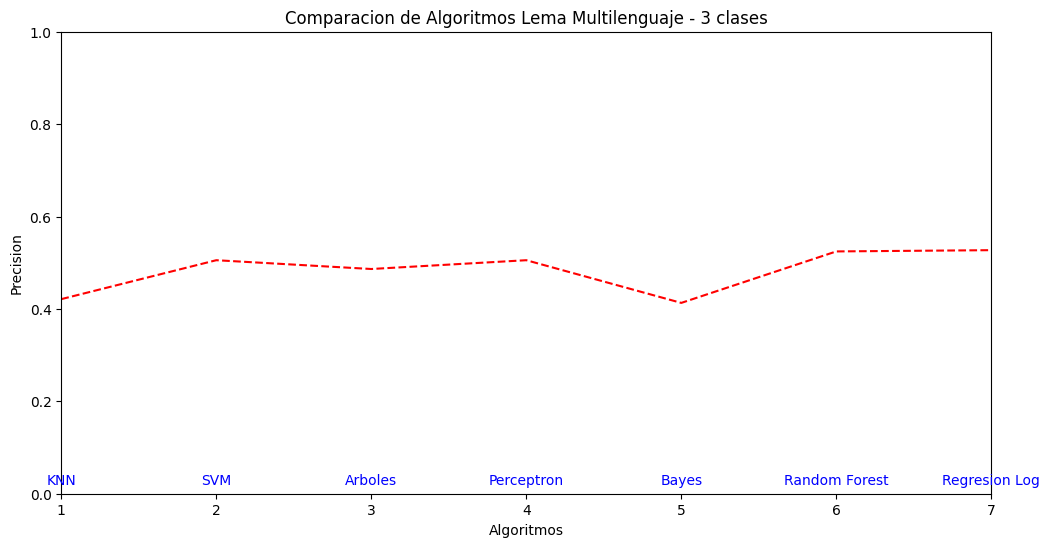

In [53]:
# Compara los resultados de los tres algoritmos mediante gráficas
plt.title("Comparacion de Algoritmos Lema Multilenguaje - 3 clases")
plt.xlabel('Algoritmos')
plt.ylabel('Precision')
plt.plot([1,2,3,4,5,6,7], [precisionKNN_Lema,precisionSVM_Lema,precisionArboles_Lema,precisionPerceptronLema,presicionNBLema,precisionRF_Lema,precisionRL_Lema], 'r--')
plt.axis([1, 7, 0, 1])
plt.text(1, 0.02, 'KNN', ha='center',color='blue')
plt.text(2, 0.02, 'SVM', ha='center',color='blue')
plt.text(3, 0.02, 'Arboles', ha='center',color='blue')
plt.text(4, 0.02, 'Perceptron', ha='center',color='blue')
plt.text(5, 0.02, 'Bayes', ha='center',color='blue')
plt.text(6, 0.02, 'Random Forest', ha='center',color='blue')
plt.text(7, 0.02, 'Regresion Log', ha='center',color='blue')
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()

In [37]:
print("***************************************************************")
print("Precisión del algoritmo K-NN para Stemmer: ",precisionKNN_Stem*100)
print("Precisión del algoritmo SVM para Stemmer: ",precisionSVM_Stem*100)
print("Precisión del algoritmo Arboles para Stemmer: ",precisionArboles_Stem*100)
print("Precisión del algoritmo Perceptron Stemmer: ",precisionPerceptronStem*100)
print("Precisión del algoritmo Bayes Stemmer: ",presicionNBStem*100)
print("Precisión del algoritmo Random Forest Stemmer: ",precisionRF_Stem*100)
print("Precisión del algoritmo Regresión Logistica:Stemmer ",precisionRL_Stem*100)
print("***************************************************************")

***************************************************************
Precisión del algoritmo K-NN para Stemmer:  41.03260869565217
Precisión del algoritmo SVM para Stemmer:  53.53260869565217
Precisión del algoritmo Arboles para Stemmer:  41.30434782608695
Precisión del algoritmo Perceptron Stemmer:  42.66304347826087
Precisión del algoritmo Bayes Stemmer:  40.21739130434783
Precisión del algoritmo Random Forest Stemmer:  49.45652173913043
Precisión del algoritmo Regresión Logistica:Stemmer  53.2608695652174
***************************************************************


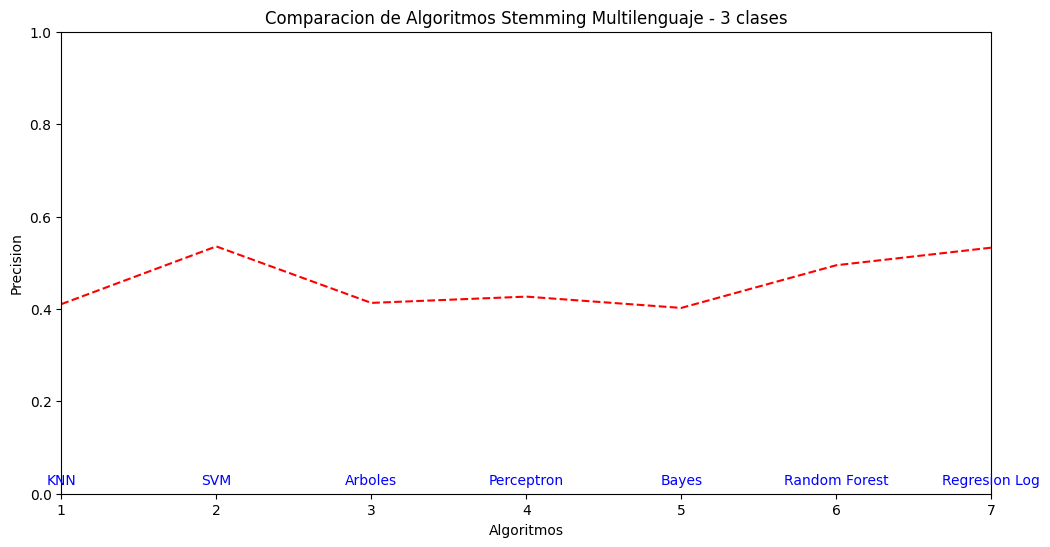

In [38]:
# Compara los resultados de los tres algoritmos mediante gráficas
plt.title("Comparacion de Algoritmos Stemming Multilenguaje - 3 clases")
plt.xlabel('Algoritmos')
plt.ylabel('Precision')
plt.plot([1,2,3,4,5,6,7], [precisionKNN_Stem,precisionSVM_Stem,precisionArboles_Stem,precisionPerceptronStem,presicionNBStem,precisionRF_Stem,precisionRL_Stem], 'r--')
plt.axis([1, 7, 0, 1])
plt.text(1, 0.02, 'KNN', ha='center',color='blue')
plt.text(2, 0.02, 'SVM', ha='center',color='blue')
plt.text(3, 0.02, 'Arboles', ha='center',color='blue')
plt.text(4, 0.02, 'Perceptron', ha='center',color='blue')
plt.text(5, 0.02, 'Bayes', ha='center',color='blue')
plt.text(6, 0.02, 'Random Forest', ha='center',color='blue')
plt.text(7, 0.02, 'Regresion Log', ha='center',color='blue')
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [28]:
rf_model = RandomForestClassifier()

# Entrenar el modelo con los datos de entrenamiento
rf_model.fit(X_entrenamientoLema, Y_entrenamientoLema)

# Realizar predicciones en los datos de prueba
y_pred = rf_model.predict(X_pruebaLema)

# Calcular la precisión del modelo
precisionRF_Lema = accuracy_score(Y_pruebaLema, y_pred)
print("Precisión del modelo: {:.2f}%".format(precisionRF_Lema * 100))

Precisión del modelo: 50.82%


In [29]:
rf_model = RandomForestClassifier()

# Entrenar el modelo con los datos de entrenamiento
rf_model.fit(X_entrenamientoStem, Y_entrenamientoStem)

# Realizar predicciones en los datos de prueba
y_pred = rf_model.predict(X_pruebaStem)

# Calcular la precisión del modelo
precisionRF_Stem = accuracy_score(Y_pruebaStem, y_pred)
print("Precisión del modelo: {:.2f}%".format(precisionRF_Stem * 100))

Precisión del modelo: 49.46%


In [30]:
# Crear el modelo de regresión logística
logreg_model = LogisticRegression()

# Entrenar el modelo con los datos de entrenamiento
logreg_model.fit(X_entrenamientoLema, Y_entrenamientoLema)

# Realizar predicciones en los datos de prueba
y_pred = logreg_model.predict(X_pruebaLema)

# Calcular la precisión del modelo
precisionRL_Lema = accuracy_score(Y_pruebaLema, y_pred)
print("Precisión del modelo: {:.2f}%".format(precisionRL_Lema * 100))

Precisión del modelo: 48.37%


In [31]:
# Crear el modelo de regresión logística
logreg_model = LogisticRegression()

# Entrenar el modelo con los datos de Y_entrenamientoStem
logreg_model.fit(X_entrenamientoStem, Y_entrenamientoStem)

# Realizar predicciones en los datos de prueba
y_pred = logreg_model.predict(X_pruebaStem)

# Calcular la precisión del modelo
precisionRL_Stem = accuracy_score(Y_pruebaStem, y_pred)
print("Precisión del modelo: {:.2f}%".format(precisionRL_Stem * 100))

Precisión del modelo: 53.26%


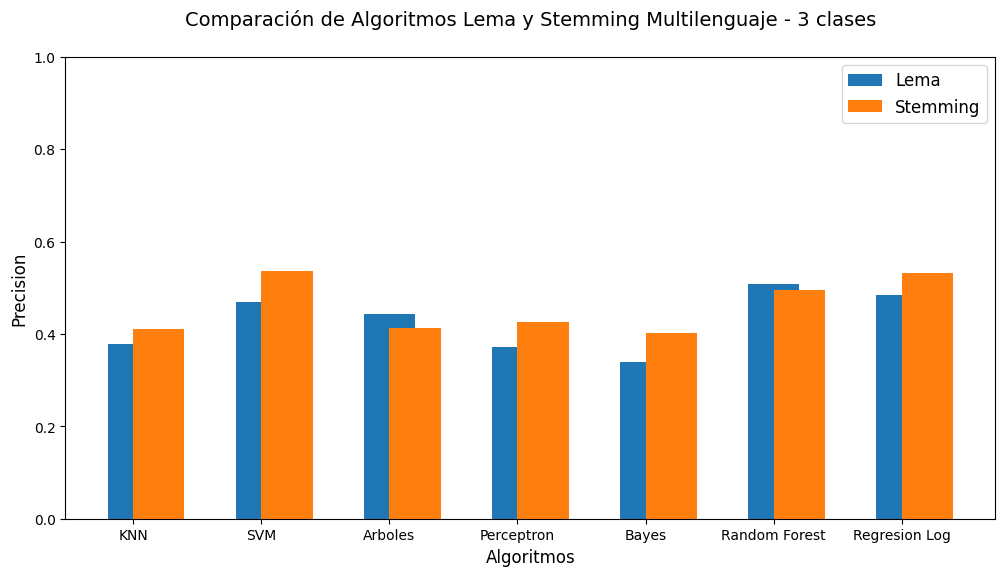

In [40]:
# Datos para el gráfico del primer código
algoritmos_lema = ['KNN', 'SVM', 'Arboles', 'Perceptron', 'Bayes', 'Random Forest', 'Regresion Log']
precision_lema = [precisionKNN_Lema, precisionSVM_Lema, precisionArboles_Lema, precisionPerceptronLema,
                   presicionNBLema, precisionRF_Lema, precisionRL_Lema]

# Datos para el gráfico del segundo código
algoritmos_stem = ['KNN', 'SVM', 'Arboles', 'Perceptron', 'Bayes', 'Random Forest', 'Regresion Log']
precision_stem = [precisionKNN_Stem, precisionSVM_Stem, precisionArboles_Stem, precisionPerceptronStem,
                  presicionNBStem, precisionRF_Stem, precisionRL_Stem]

# Configuración del gráfico
plt.figure(figsize=(12, 6))
plt.title("Comparación de Algoritmos Lema y Stemming Multilenguaje - 3 clases", fontsize=14, y=1.05)
plt.xlabel('Algoritmos', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.ylim(0, 1)  # Establecer límites en el eje y

# Creación de las barras
plt.bar(range(len(algoritmos_lema)), precision_lema, width=0.4, align='center', label='Lema')
plt.bar(range(len(algoritmos_stem)), precision_stem, width=0.4, align='edge', label='Stemming')

# Etiquetas de los algoritmos en el eje x
plt.xticks(range(len(algoritmos_lema)), algoritmos_lema, fontsize=10)

# Leyenda
plt.legend(fontsize=12)

# Mostrar el gráfico
plt.show()